In [4]:
# Style + content = genrated image

In [2]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [3]:
#  https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2

In [4]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# ***Preprocess image***


In [5]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img , channels = 3)
  img = tf.image.convert_image_dtype(img , tf.float32)
  img = img[tf.newaxis , :]

  return img

In [21]:
content_image = load_image('/content/index.jpg')
style_image = load_image('/content/starrynight.jfif')

In [9]:
content_image.shape , style_image.shape

(TensorShape([1, 814, 1085, 3]), TensorShape([1, 200, 252, 3]))

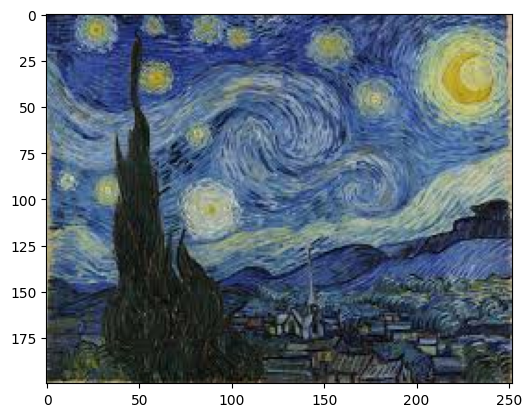

In [10]:
plt.imshow(np.squeeze(style_image))
plt.show()

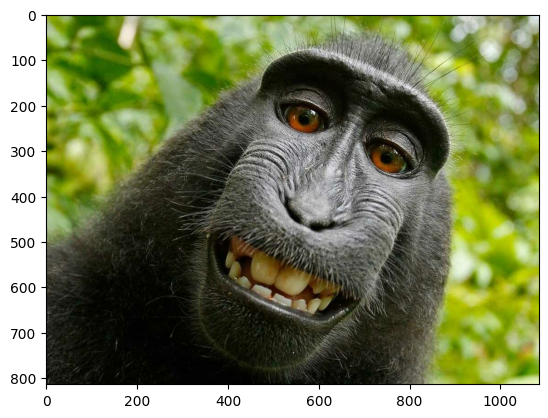

In [11]:
plt.imshow(np.squeeze(content_image))
plt.show()

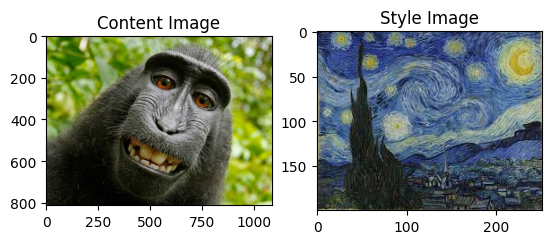

In [19]:
content_image = content_image.squeeze()
style_image = style_image.squeeze()

# Display the images side by side
plt.subplot(1, 2, 1)
plt.imshow(content_image)
plt.title('Content Image')

plt.subplot(1, 2, 2)
plt.imshow(style_image)
plt.title('Style Image')

plt.show()

In [12]:
genrated_image = model(tf.constant(content_image), tf.constant(style_image))[0]

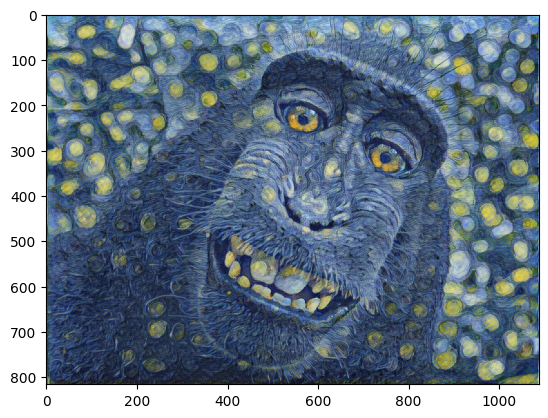

In [13]:
plt.imshow(np.squeeze(genrated_image))
plt.show()